In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import numpy as np
import json
import os
style.use('seaborn')
os.chdir('scraped news')

### How many news days are scraped (number of files)?

In [2]:
num_scraped_days = len(os.listdir())
print(f'Number of scraped days = {num_scraped_days}')

Number of scraped days = 8


### How many archive days are missing? (Page Not found)
Set start and finish dates between which we check scraped day membership using start_day and finish_day. Start day inclusive, finish day exclusive. Output prints missing dates, number of missing days and their percentage.

In [3]:
start_day = datetime.date(2018, 1, 1)
finish_day = datetime.date(2018, 1, 11)
days_set = {file.split('.')[0] for file in os.listdir()}
t_delta = datetime.timedelta(days=1)
missing_days = []
while start_day != finish_day:
    if str(start_day) not in days_set: missing_days.append(start_day)
    start_day += t_delta
for d in missing_days: print(d)
prc_missing = round((len(missing_days) / num_scraped_days)*100, 2)
print(f'Number of missing days = {len(missing_days)}')
print(f'Percent of missing days = %{prc_missing}')

2018-01-08
2018-01-09
Number of missing days = 2
Percent of missing days = %25.0


### How many news articles are scraped in total?
Outputs number of valid scraped stories, as well as, number of articles deleted from the archive by Reuters "Page Not Found" error.

In [4]:
num_of_articles = 0
num_missing = 0
for file in os.listdir():
    with open(file, 'r') as f:
        arts_in_day = json.load(f)
    for art in arts_in_day:
        if art['title'] == None: num_missing += 1
        else: num_of_articles += 1
print(f'Number of valid articles scraped: {num_of_articles}')
print(f'Number of missing articles (Page Not Found): {num_missing}')

Number of valid articles scraped: 6384
Number of missing articles (Page Not Found): 30


### Number of articles published per month (timeline distribution)
Plots bar chart showing number of articles gathered per each calendar month within the scraped period. If only one month data (or less) was scraped - the chart will only have one bar.

2018-Jan 6414


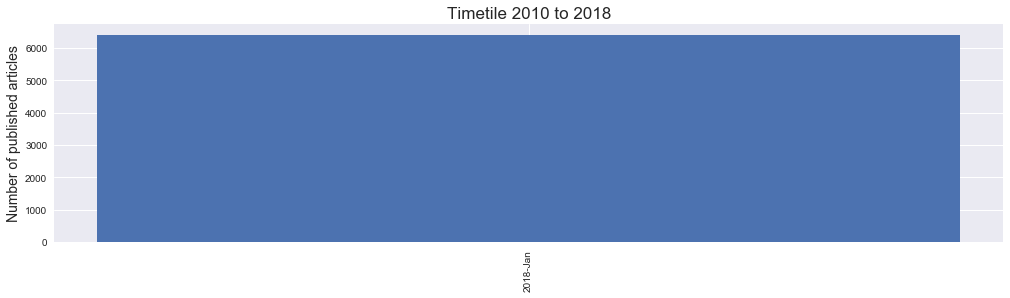

In [5]:
t_delta = datetime.timedelta(days=1)
months = {}
arts_published = 0
curr_month = 1
for file in os.listdir():
    date = datetime.datetime.strptime(file.split('.')[0], '%Y-%m-%d').date()
    if date.month != curr_month:
        months[(date-t_delta).strftime('%Y-%b')] = arts_published
        arts_published = 0
        curr_month = date.month
    with open(file, 'r') as f:
        arts_in_day = json.load(f)
    arts_published += len(arts_in_day)
months[date.strftime('%Y-%b')] = arts_published
for key, val in months.items():
    print(key, val)
categories = months.keys()
values = months.values()
positions = np.arange(len(categories))
plt.figure(figsize=(17,4))
plt.xticks(positions, categories, rotation=90, size=10)
plt.bar(positions, values)
plt.ylabel('Number of published articles', size=14)
plt.title('Timetile 2010 to 2018', size=17)
plt.savefig('../data exploration results/Monthly Timeline.png', bbox_inches='tight')
plt.show()

### Number of articles published per weekday (distribution)

Mon 201
Tue 219
Wed 2402
Thu 1186
Fri 1221
Sat 1016
Sun 169


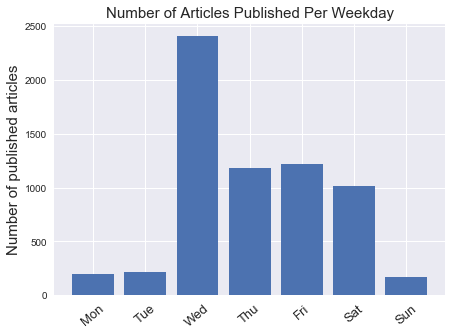

In [6]:
days_ = {'Mon':0, 'Tue':0, 'Wed':0, 'Thu':0, 'Fri':0, 'Sat':0, 'Sun':0}
for file in os.listdir():
    date = datetime.datetime.strptime(file.split('.')[0], '%Y-%m-%d').date()
    with open(file, 'r') as f:
        arts_in_day = json.load(f)
    days_[date.strftime('%a')] += len(arts_in_day)
for key, val in days_.items():
    print(key, val)
categories = days_.keys()
values = days_.values()
positions = np.arange(len(categories))
plt.figure(figsize=(7,5))
plt.xticks(positions, categories, rotation=40, size=13)
plt.bar(positions, values)
plt.ylabel('Number of published articles', size=15)
plt.title('Number of Articles Published Per Weekday', size=15)
plt.savefig('../data exploration results/Weekday Distribution.png', bbox_inches='tight')
plt.show()

### How many news categories are there? What are the most popular ones?

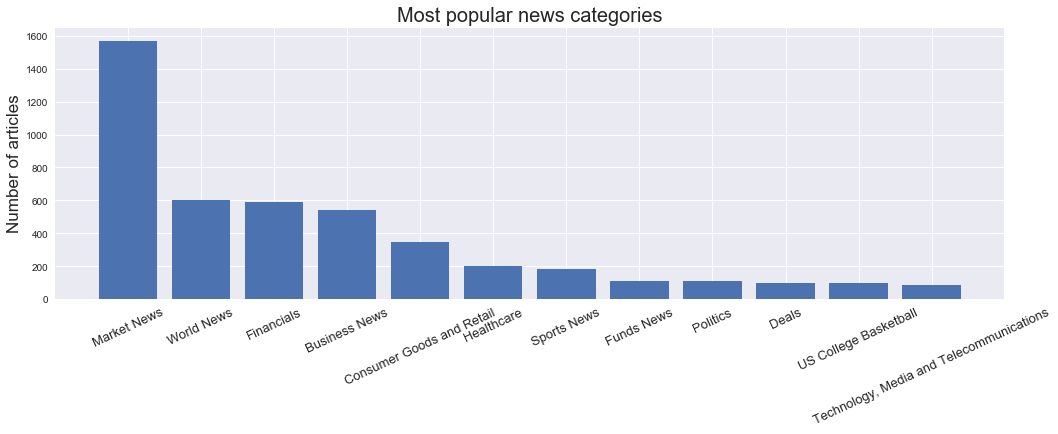

Total number of news categories is 95
Market News   1570   24.59%
World News   600   9.4%
Financials   591   9.26%
Business News   544   8.52%
Consumer Goods and Retail   351   5.5%
Healthcare   203   3.18%
Sports News   184   2.88%
Funds News   113   1.77%
Politics   112   1.75%
Deals   100   1.57%
US College Basketball   97   1.52%
Technology, Media and Telecommunications   90   1.41%
Environment   89   1.39%
Commodities   88   1.38%
IT Services & Consulting   84   1.32%
Health News   77   1.21%
Cyclical Consumer Goods   69   1.08%
Technology News   68   1.07%
Asia   67   1.05%
Credit RSS   63   0.99%
Auto & Truck Manufacturers   62   0.97%
Chinese Labor Unrest   62   0.97%
US NBA   61   0.96%
Big Story 10   61   0.96%
US NHL   59   0.92%
U.S.   55   0.86%
Entertainment News   49   0.77%
Communications Equipment   49   0.77%
Industrials   48   0.75%
Energy   48   0.75%
Software   47   0.74%
Westlaw News   46   0.72%
Apparel & Accessories   37   0.58%
Semiconductors   34   0.53%
US NF

In [7]:
news_cats = {}
for file in os.listdir():
    with open(file, 'r') as f:
        arts_in_day = json.load(f)
    for art in arts_in_day:
        if art['news_category'] not in news_cats: news_cats[art['news_category']] = 0
        news_cats[art['news_category']] += 1
number_of_cats = len(news_cats)
categories = []
values = []
for key in sorted(news_cats, key=news_cats.get, reverse=True)[:12]:
    categories.append(key)
    values.append(news_cats[key])
plt.figure(figsize=(17, 5))
positions = np.arange(len(categories))
plt.xticks(positions, categories, rotation=25, size=13)
plt.bar(positions,values)
plt.ylabel('Number of articles', size=17)
plt.title('Most popular news categories', size=20)
plt.savefig('../data exploration results/Most Popular News Categories.png', bbox_inches='tight')
plt.show()
print(f'Total number of news categories is {number_of_cats}')
with open("../data exploration results/Most Popular News Categories.txt", 'w') as f:
    for key in sorted(news_cats, key=news_cats.get, reverse=True):
        percentage = round((news_cats[key]/num_of_articles)*100, 2)
        txt = f'{key}   {news_cats[key]}   {str(percentage)}%'
        print(txt)
        f.write(txt)
        f.write('\n')